In [9]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
expl_method = "GradCAM"
# expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
# transform = ['color'] 
# transform = ['spatial', 'noise', 'color']
transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [11]:
with open(f"val_center_crop_224_seed_{seed}.npy", "rb") as f:
    filelist = np.load(f)

In [22]:
base = []
our = []
avg = []

read_num = 0

for filepath in filelist:
    filename = os.path.basename(filepath)

    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_perturb_num_1000_{filename}.pt"
    try:
        log = torch.load(log_name)
        base.append(log[0])
        our.append(log[1])
        avg.append(log[2])
        read_num += 1
    except:
        break
base = torch.stack(base)
our = torch.stack(our)
avg = torch.stack(avg)


tensor([0.0006, 0.0221, 0.0675, 0.0852, 0.0850, 0.0977, 0.1189, 0.1370, 0.1543,
        0.1675, 0.1752])

In [14]:
our / read_num

tensor([0.0012, 0.0071, 0.0206, 0.0299, 0.0440, 0.0641, 0.0881, 0.1222, 0.1522,
        0.1884, 0.2071])

In [15]:
avg / read_num

tensor([0.0012, 0.0061, 0.0172, 0.0291, 0.0382, 0.0572, 0.0852, 0.1150, 0.1364,
        0.1665, 0.1886])

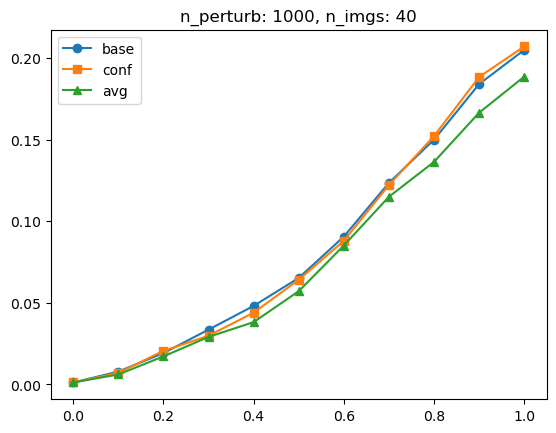

In [25]:
plt.plot(np.arange(0, 1.05, 0.1), (base.mean(0)), '-o', label="base")
plt.plot(np.arange(0, 1.05, 0.1), our.mean(0), '-s', label = "conf")
plt.plot(np.arange(0, 1.05, 0.1), avg.mean(0), '-^', label = "avg")

plt.title(f"n_perturb: 1000, n_imgs: {read_num}")
plt.legend()


In [19]:
print((base/read_num).mean(), (our/read_num).mean(), (avg/read_num).mean())

tensor(0.0844) tensor(0.0841) tensor(0.0764)
